# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

In [1]:
#load useful libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

In [2]:
#import the data
df = pd.read_csv("Summary of Weather.csv", encoding='latin1')
df.shape[0] # number of rows in the dataframe

C:\Users\GGPC\AppData\Local\Temp\ipykernel_28476\482264606.py:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Summary of Weather.csv", encoding='latin1')


119040

In [3]:
missing_data = df.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

             Empty Cells
STA                    0
Date                   0
Precip                 0
WindGustSpd       118508
MaxTemp                0
MinTemp                0
MeanTemp               0
Snowfall            1163
PoorWeather        84803
YR                     0
MO                     0
DA                     0
PRCP                1932
DR                118507
SPD               118508
MAX                  474
MIN                  468
MEA                  498
SNF                 1163
SND               113477
FT                119040
FB                119040
FTI               119040
ITH               119040
PGT               118515
TSHDSBRSGF         84803
SD3               119040
RHX               119040
RHN               119040
RVG               119040
WTE               119040


In [4]:
df = df.convert_dtypes()
df.dtypes

STA                     Int64
Date           string[python]
Precip         string[python]
WindGustSpd           Float64
MaxTemp               Float64
MinTemp               Float64
MeanTemp              Float64
Snowfall               object
PoorWeather            object
YR                      Int64
MO                      Int64
DA                      Int64
PRCP           string[python]
DR                      Int64
SPD                     Int64
MAX                     Int64
MIN                     Int64
MEA                     Int64
SNF                    object
SND                     Int64
FT                      Int64
FB                      Int64
FTI                     Int64
ITH                     Int64
PGT                   Float64
TSHDSBRSGF             object
SD3                     Int64
RHX                     Int64
RHN                     Int64
RVG                     Int64
WTE                     Int64
dtype: object

## 2. Clean the dataset, drop variables

In [5]:
# We can tremove any column that is 100$ empty
df = df.dropna(axis=1, how='all')
df.dtypes

STA                     Int64
Date           string[python]
Precip         string[python]
WindGustSpd           Float64
MaxTemp               Float64
MinTemp               Float64
MeanTemp              Float64
Snowfall               object
PoorWeather            object
YR                      Int64
MO                      Int64
DA                      Int64
PRCP           string[python]
DR                      Int64
SPD                     Int64
MAX                     Int64
MIN                     Int64
MEA                     Int64
SNF                    object
SND                     Int64
PGT                   Float64
TSHDSBRSGF             object
dtype: object

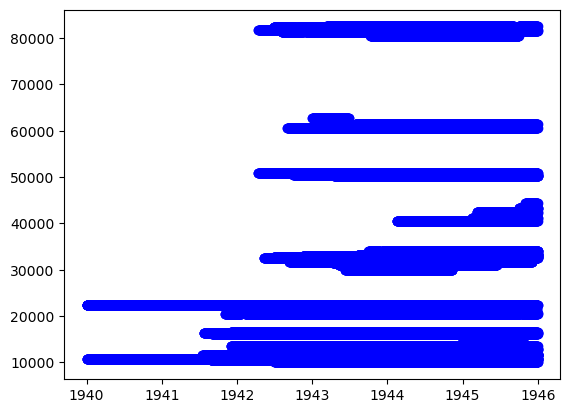

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
plt.scatter(df['Date'], df['STA'], marker='o', linestyle='-', color='b')

C:\Users\GGPC\AppData\Local\Temp\ipykernel_28476\2697585520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip['Precip'] = pd.to_numeric(df_precip['Precip'], errors='coerce')


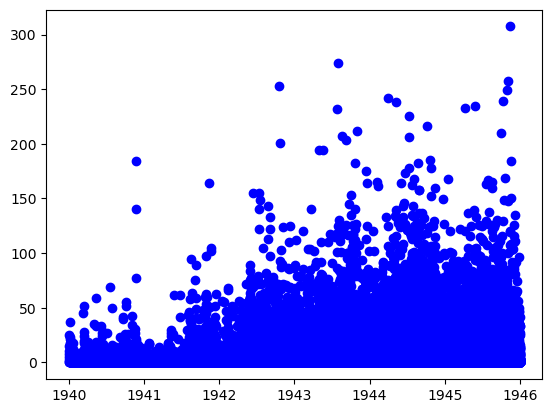

In [7]:
df_precip = df[df['Precip'] != 'T']
df_precip['Precip'] = pd.to_numeric(df_precip['Precip'], errors='coerce')
df_precip.head(10)
plt.scatter(df_precip['Date'], df_precip['Precip'], marker='o', linestyle='-', color='b')
df_precip = None

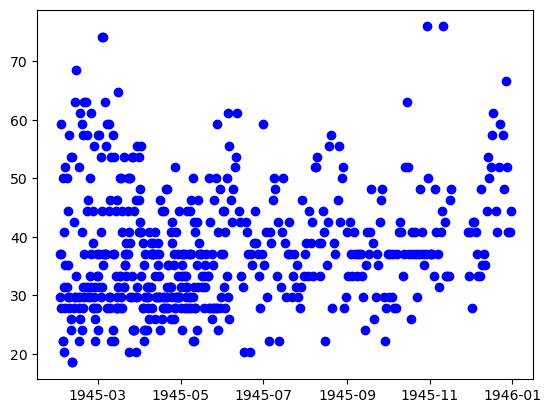

In [8]:
plt.scatter(df['Date'], df['WindGustSpd'], marker='o', linestyle='-', color='b')

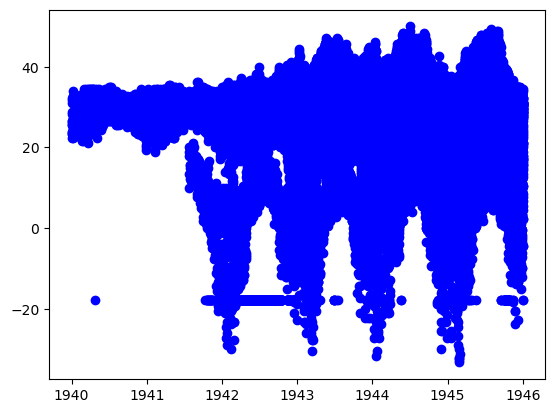

In [9]:
plt.scatter(df['Date'], df['MaxTemp'], marker='o', linestyle='-', color='b')

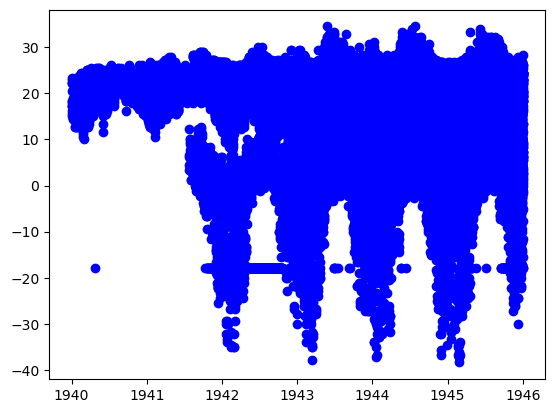

In [10]:
plt.scatter(df['Date'], df['MinTemp'], marker='o', linestyle='-', color='b')

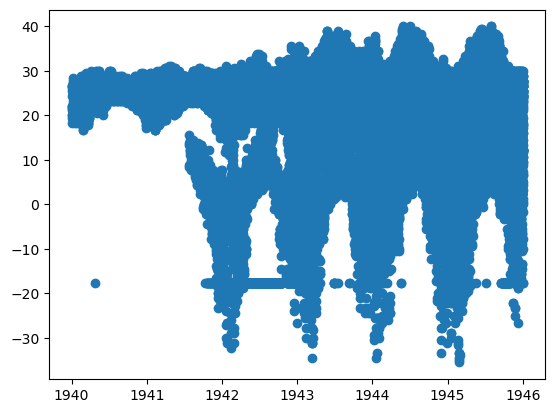

In [11]:
plt.scatter(df["Date"], df["MeanTemp"])

We can see erronius data where max and min temp are the same all at (visably) the same location thus we need to remove values where max temp = min temp

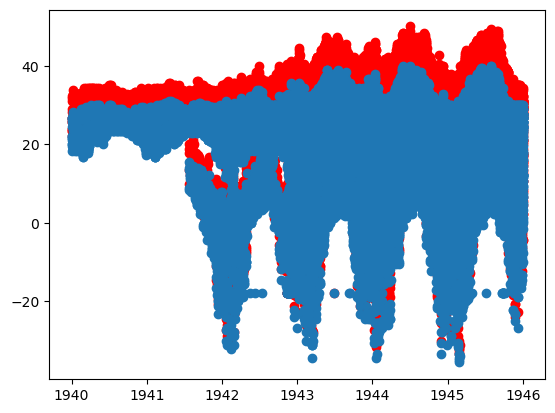

In [12]:
df = df[df['MaxTemp'] != df['MinTemp']]
plt.scatter(df["Date"], df["MaxTemp"], color='red', label='Max Temp')
plt.scatter(df["Date"], df["MeanTemp"])

In [13]:
df = df[df['MaxTemp'] > df['MeanTemp']]
df = df[df['MinTemp'] < df['MeanTemp']]

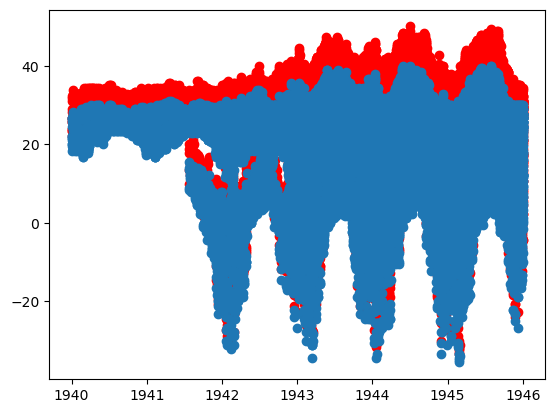

In [14]:
df = df[df['MaxTemp'] != df['MinTemp']]
plt.scatter(df["Date"], df["MaxTemp"], color='red', label='Max Temp')
plt.scatter(df["Date"], df["MeanTemp"])

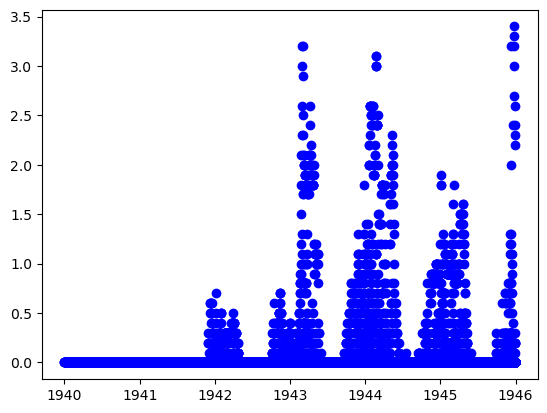

In [15]:
if "Snowfall" in df.columns:
    df_temp = df[["Date","STA", "Snowfall", "SNF"]]
    df_temp = df_temp[df_temp['Snowfall'] != 0.0].dropna(subset=['Snowfall'])
    df_temp = df_temp[df_temp['Snowfall'] != '0']
    # We can see that Snowfall is always 25.4x the SNF value thus we can drop the Snowfall column
    df = df.drop(columns=['Snowfall'])

df_temp = df[["Date", "SNF"]]
df_temp = df_temp[df_temp['SNF'] != 'T'].dropna()
plt.scatter(df_temp["Date"], df_temp["SNF"], color='blue', label='SNF')


In [16]:
df["PoorWeather"].value_counts()
#plt.scatter(df["Date"], df["MinTemp"], color='b')

PoorWeather
1             25817
1.0            6134
0               869
1     1         310
100000          263
1 1             133
1 1  1           96
1000             90
100001           62
1    1           56
101000           56
1000001000       52
1  1             49
1000001001       45
11               39
1100000          16
1001             16
1   1 1          14
101001           14
1000101001       13
1000101000        9
11 1              8
1000000           7
1000000000        6
1     1  1        5
11    1           5
1010001000        5
1010001001        2
1 0  1            2
1   1 1  1        2
1000100001        2
1101000           2
10001001          1
1     0           1
1000100000        1
1 0               1
1101001           1
1   1             1
1        1        1
Name: count, dtype: int64

In [17]:
df_temp = df[['Date', 'Precip', 'PRCP']]


df_temp[df_temp['PRCP'] == '']

# For missing values (NaN)
df_temp[df_temp['PRCP'].isna()]

# For both empty strings and NaN
df_temp[(df_temp['PRCP'] == '') | (df_temp['PRCP'].isna())] 

,Date,Precip,PRCP
900,1944-12-18,0,<NA>
1744,1945-01-18,0,<NA>
1916,1945-07-09,0,<NA>
1917,1945-07-10,0,<NA>
1918,1945-07-11,0,<NA>
...,...,...,...
118841,1945-05-17,0,<NA>
118842,1945-05-18,0,<NA>
118843,1945-05-19,0,<NA>
118844,1945-05-20,0,<NA>


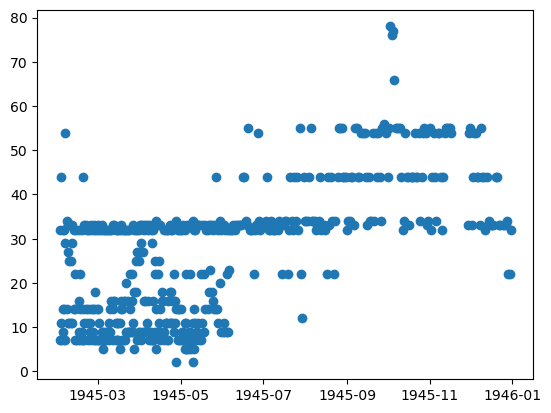

In [18]:
plt.scatter(df["Date"], df["DR"])

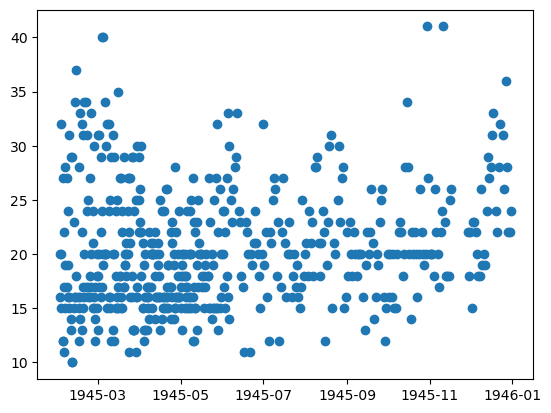

In [19]:
plt.scatter(df["Date"], df["SPD"])

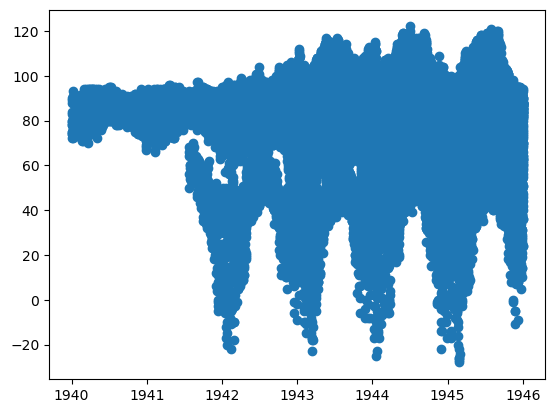

In [20]:
plt.scatter(df["Date"], df["MAX"])

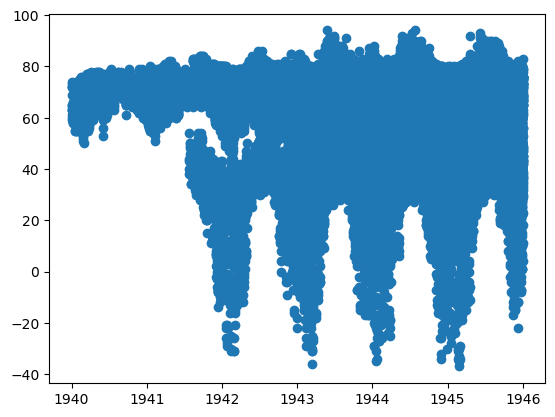

In [21]:
plt.scatter(df["Date"], df["MIN"])

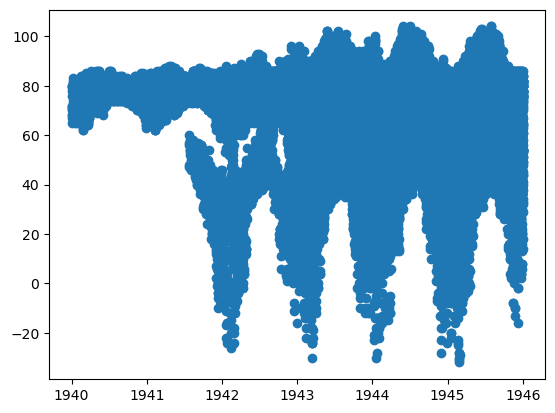

In [22]:
plt.scatter(df["Date"], df["MEA"])

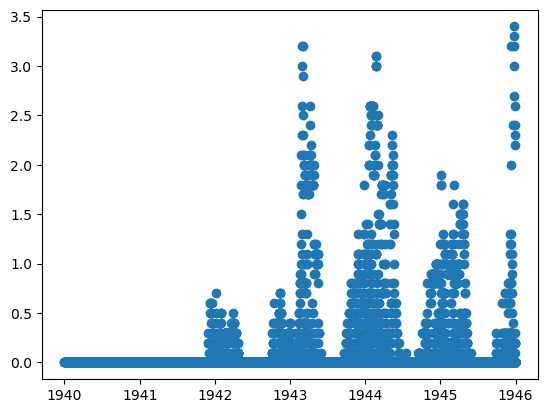

In [23]:

df['SNF'] = df['SNF'].replace(['T'], 0.01)
df.head()

plt.scatter(df["Date"], df["SNF"])

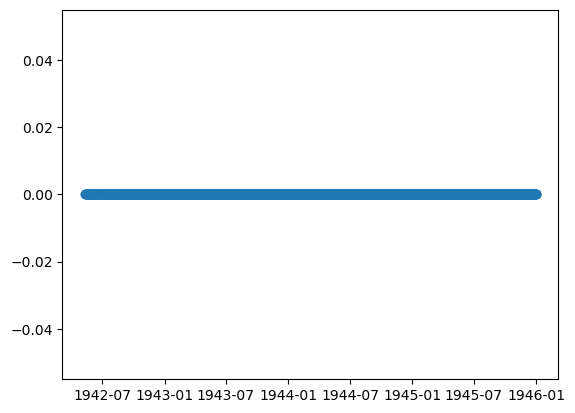

In [24]:
plt.scatter(df["Date"], df["SND"])

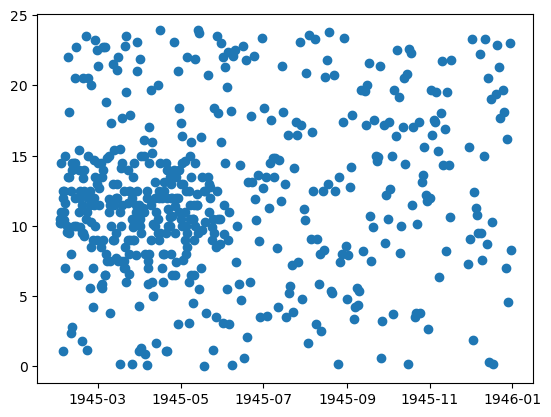

In [25]:
plt.scatter(df["Date"], df["PGT"])

In [26]:
#plt.scatter(df["Date"], df["TSHDSBRSGF"])

df_temp = df["TSHDSBRSGF"]
df_temp.head()
df_temp.unique()

array([nan, '1', '1     1', '1 1', '1     1  1', '1  1', '1        1',
       '0', '1   1 1', '1    1', '1     0', '1000', '1001', '100000',
       '1000001000', '101000', '101001', '1000001001', '1000101001',
       '100001', '1000000000', '1000101000', '1010001000', '1000100000',
       '1000100001', '1010001001', '10001001', '11', '11 1', '11    1',
       '1100000', '1 1  1', '1 0  1', '1 0', '1   1 1  1', '1000000',
       '1101000', '1101001', '1   1', 1.0], dtype=object)

In [27]:
df.dtypes

STA                     Int64
Date           datetime64[ns]
Precip         string[python]
WindGustSpd           Float64
MaxTemp               Float64
MinTemp               Float64
MeanTemp              Float64
PoorWeather            object
YR                      Int64
MO                      Int64
DA                      Int64
PRCP           string[python]
DR                      Int64
SPD                     Int64
MAX                     Int64
MIN                     Int64
MEA                     Int64
SNF                    object
SND                     Int64
PGT                   Float64
TSHDSBRSGF             object
dtype: object

In [28]:
df = df.drop(columns=["MEA", "MAX", "MIN", "PRCP", "PoorWeather", "PGT", "WindGustSpd", "SPD", "TSHDSBRSGF"])
df.dtypes

STA                  Int64
Date        datetime64[ns]
Precip      string[python]
MaxTemp            Float64
MinTemp            Float64
MeanTemp           Float64
YR                   Int64
MO                   Int64
DA                   Int64
DR                   Int64
SNF                 object
SND                  Int64
dtype: object

In [29]:
df['Precip'] = df["Precip"].replace(['T'], '0.01')
df['Precip'] = df["Precip"].astype(float)
df.head()

df = df.replace('', 0).fillna(0)

df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SNF,SND
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,42,7,1,0,0.0,0
1,10001,1942-07-02,0.000,28.888889,21.666667,25.555556,42,7,2,0,0.0,0
2,10001,1942-07-03,2.540,26.111111,22.222222,24.444444,42,7,3,0,0.0,0
3,10001,1942-07-04,2.540,26.666667,22.222222,24.444444,42,7,4,0,0.0,0
4,10001,1942-07-05,0.000,26.666667,21.666667,24.444444,42,7,5,0,0.0,0


Correlation Matrix:
               STA    Precip   MaxTemp   MinTemp  MeanTemp        YR  \
STA       1.000000  0.013683  0.083738  0.050555  0.069611  0.118665   
Precip    0.013683  1.000000  0.004406  0.091928  0.049313  0.008869   
MaxTemp   0.083738  0.004406  1.000000  0.873505  0.968271  0.013790   
MinTemp   0.050555  0.091928  0.873505  1.000000  0.966460 -0.043471   
MeanTemp  0.069611  0.049313  0.968271  0.966460  1.000000 -0.014957   
YR        0.118665  0.008869  0.013790 -0.043471 -0.014957  1.000000   
MO       -0.008904  0.037838  0.034365  0.072573  0.054930 -0.144962   
DA        0.001285  0.000695 -0.003316 -0.000770 -0.002105 -0.010634   
DR       -0.020155  0.027177  0.012641  0.038450  0.027234  0.061361   
SND            NaN       NaN       NaN       NaN       NaN       NaN   

                MO        DA        DR  SND  
STA      -0.008904  0.001285 -0.020155  NaN  
Precip    0.037838  0.000695  0.027177  NaN  
MaxTemp   0.034365 -0.003316  0.012641  NaN  
Min

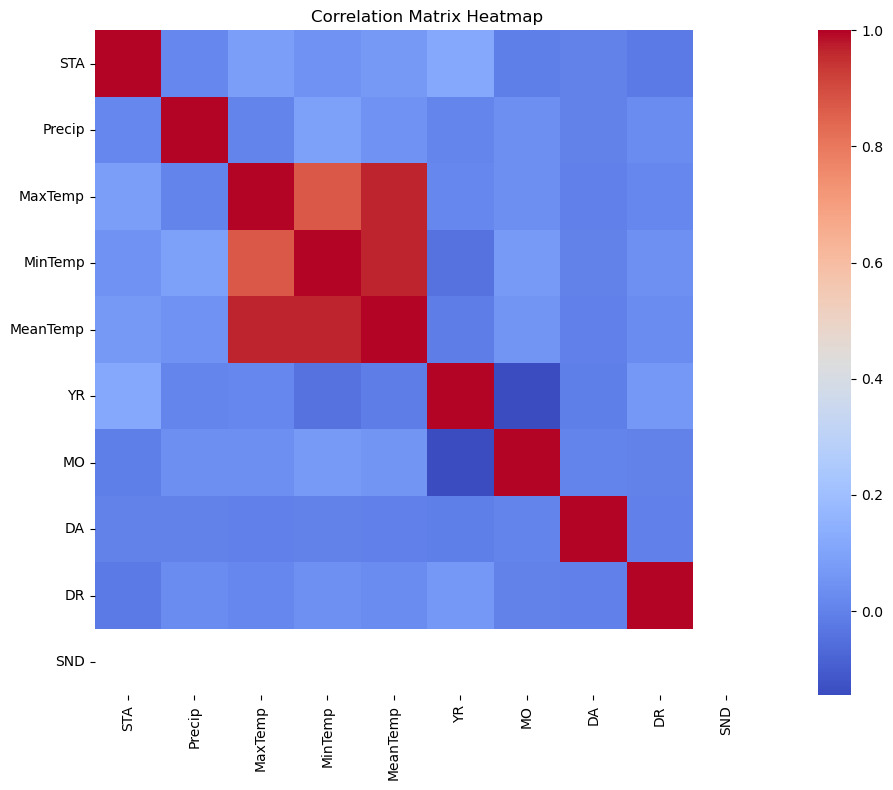

In [30]:

corr_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


In [31]:
df.drop(columns=["YR", "SND"])
df.head(1)

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SNF,SND
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,42,7,1,0,0.0,0


## 3. Select the feature(s) for the model, and explain the reason

The features I have decided to use for my modle are Max Temp, MeanTemp, MO, DR, and SNF.
I dropped any data that only had entries after 1942 as this would introduce bais, i also dropped PoorWeather and TSHDSBRSGF due to indiscernible data that i wasnt able to change into numerical data, additinally i dropped the more data (such as MAX and Snowfall) due to it begin duplicates of other columns (such as MaxTemp and SNF). Lastly i dropped YR and SND, i dropped SND because there was it was entirely 0 or NA, and i dropped YR because while there was a correlation this might actually hurt the data as the year is correlated with weather stations (STA) in colder regions being opened later in the data.

## 4. Split the dataset (80% for training, 20% for testing)

In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ["MaxTemp", "MeanTemp", "MO", "DR", "SNF"]
X = df[features].values
y = df["MinTemp"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## 5. Choose the algorithm, train and test the model

In [33]:
#ADD Neural NET

def train_nn(size, max_iter):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train 1-layer neural network
    mlp = MLPRegressor(hidden_layer_sizes=size, activation='tanh', max_iter = max_iter, random_state=42)
    mlp.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = mlp.predict(X_test_scaled)
    return y_pred, y_test


In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calc_rmse(y_pred, y_test):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse


In [45]:

y_pred, y_test = train_nn((), 100)
rmse = calc_rmse(y_pred, y_test)
print(rmse)

0.4998680235286832


## 6. Evaluate and Visualize model Performance

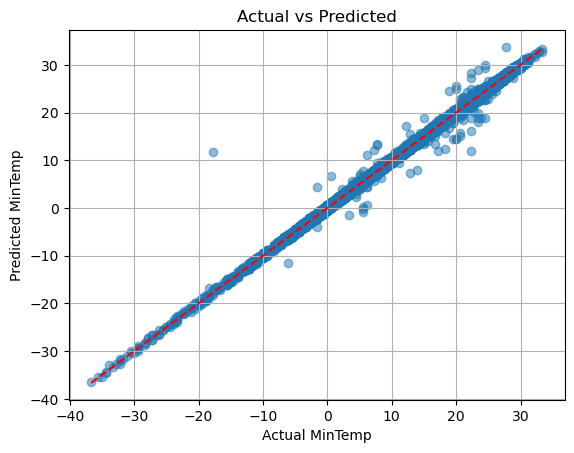

In [50]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test, y_pred):
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), np.max(y_test)], [min(y_test), np.max(y_test)], 'r--')
    plt.xlabel("Actual MinTemp")
    plt.ylabel("Predicted MinTemp")
    plt.title("Actual vs Predicted")
    plt.grid(True)
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)

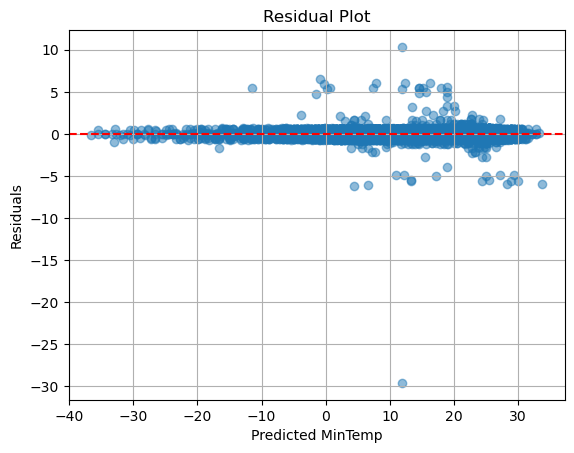

In [51]:
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted MinTemp")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.grid(True)
    plt.show()

plot_residuals(y_test, y_pred)

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [53]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.9962
RMSE: 0.4999


The model has an R² value of 0.9962 and a Root Mean Squared Error (RMSE) of approximately 0.50.

R² = 0.9962 means the model explains over 99.6% of the variation in minimum temperature. This indicates a very strong fit — the model captures nearly all the structure in the data.

RMSE = 0.50 indicates that, on average, the model's predictions deviate from the actual values by only 0.5 units (likely degrees Celsius), which is very low given the typical range of temperatures in your dataset.

Together, these metrics show that the model is highly accurate and reliable for predicting minimum temperatures from the given features.



## 8. Discuss the model performance based on the plot

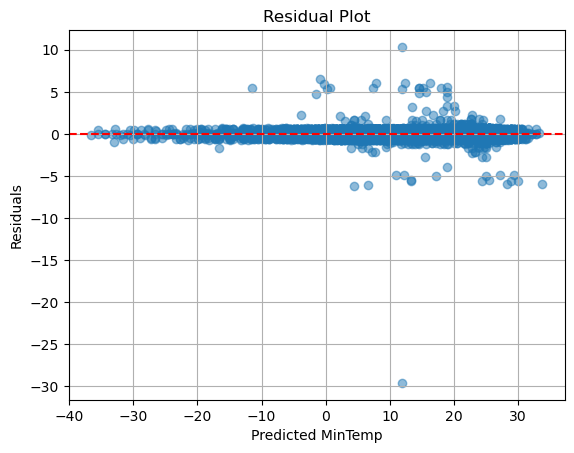

In [54]:
# write your answer here
plot_residuals(y_test, y_pred)

There are signs of systematic bias, particularly in the model’s performance at higher temperatures, where it is noticeably less accurate. In contrast, the model is very accurate at sub-zero temperatures, with fewer outliers and a visible trend of tighter clustering as temperature decreases.

There is one extreme outlier with a residual of approximately 30, and another around 10. The remaining predictions mostly fall within a range of ±6, indicating that the model is generally reliable across most of the dataset.